# Lab 11b
In this lab activities guide you to practice basic skills that were previously covered but can use some refreshing. Some of these are particularly useful for Assignment 3.


## Activity 1
In notebook 3 you have seen numpy's `loadtxt` function. Pull up the docstring again and study the arguments. Note the difference between required and optional arguments (the ones with equal signs). Specifically pay attention to the `unpack` option and the `usecols` options.

In the `data` directory you find a data file with surface properties a model star with a mass 20 times that of the sun, as a function of time. The header describes that the colums are. Open the file and have a look. Recall that you can turn any code cell into a bash cell with the command `%%bash` in the first line. One-line bash commands, such as `cat` or `head` will be understood even without that in a regular python code cell.

Use the `loadtxt` function to read the data in the file.

Make a plot of 
1. The log10 stellar luminosity as a function of the log10 effective temperature. It is customary in astronomy to have the temperature decrease on the abscissa so that cooler, redder objects would be on the right of the diagram. 
2. log10 R as a function of time (star_age).
Save each of these plots to a png image using the `savefig('filename.png')` command.

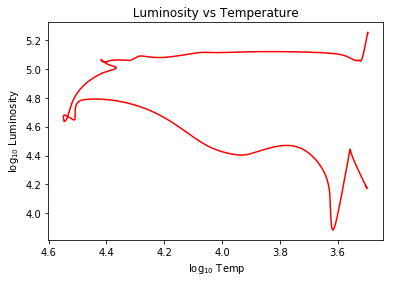

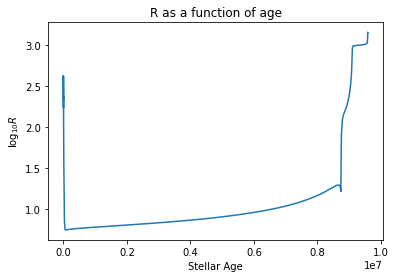

In [32]:
age,L,T,R=lt("M20star-surface.dat",usecols=(0,1,2,3),unpack=True)
plt.gca().invert_xaxis()
plt.plot(T,L,'r-')
plt.xlabel(" $\log_{10}$ Temp ")
plt.ylabel(" $\log_{10}$ Luminosity ")
plt.title(" Luminosity vs Temperature ")
plt.savefig("non-derpy-stellar-plot.png")
plt.show()

# %%
plt.plot(age,R)
plt.xlabel("Stellar Age")
plt.ylabel("$\log_{10} R$")
plt.title("R as a function of age")
plt.show()

## Activity 2
Accordung to fundamental physics the surface temperature and luminosity should be related to the radius of the star according to the [Stefan-Boltzmann law](https://en.wikipedia.org/wiki/Stefan%E2%80%93Boltzmann_law). Specifically for stars it can be cast as
$$
L = 4 \pi R^2  \sigma T_\mathrm{eff}^4
$$
where $\sigma$ is the Stefan-Boltzmann constant, and $R$, $L$ and $T_\mathrm{eff}$ are the star's radius, luminosity and _effective_ temperature. 

Use the radius and temperature read from the file, and the astropy constant and units package to calculate $L$. Compare that Stefan-Boltzmann L to the L from the file. They should be the same! Are they?

Hint: The units package has solar radius etc as units, e.g. `units.Rsun`. Also remember that the `astropy.constants` package provides just that!

[4.19068995 4.20185995 4.20184597 ... 5.24572289 5.2457229  5.24572292] [13.09002866 13.10119866 13.10118467 ... 14.14506159 14.14506161
 14.14506162]


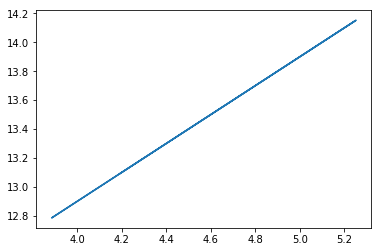

In [20]:
from astropy import units as u
from astropy.units import R_sun
from numpy import pi,sqrt
from numpy import loadtxt as lt


L,T,R=lt("M20star-surface.dat",usecols=(1,2,3),unpack=True)
sigma = 5.670367 * (10**-8) # * u.W * u.m**-2 * u.K**-4
R=10**R
T=10**T
L_2 = 4 * pi * R**2 * sigma * T**4
print(L,np.log10(L_2))

plt.plot(L,np.log10(L_2))
plt.show()

The difference is ...

## Activity 3
During the hydrogen burning phase the model temperature and lumunosity are within the following ranges: 

* `logTeff` in the range `[4.365,4.551]` and 
* `logL` is in range `[4.620, 5.089]`.

Find the list of indices that refer to data points with Teff and L within these bounds.

How many points are in that list?

Create new short arrays `slogTeff` and `slogL` which contain Teff and L in the range just determined, but only every 50th data point. Use array slicing to accomplish that.

Use the numpy function `savetxt` to write `slogTeff` and `slogL`  as columns into the file 'short-data.dat'. Remember that if `a` is an array, then `a.T` is the transpose. This may be useful here. Also, add a meaningful header with column heads.

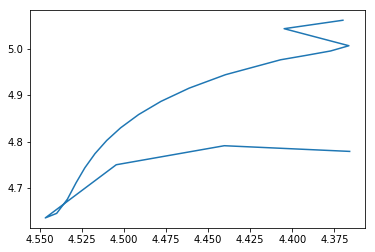

In [26]:
from numpy import loadtxt as lt
from numpy import pi,sqrt
import numpy as np
import matplotlib.pyplot as plt
# During the hydrogen burning phase the model temperature and lumunosity are within the following ranges:
# * `logTeff` in the range `[4.365,4.551]` and
# * `logL` is in range `[4.620, 5.089]`.
age,L,T,R=lt("M20star-surface.dat", usecols=(0,1,2,3),unpack=True)
# Find the list of indices that refer to data points with Teff and L within these bounds.

Tindex=[];Lindex=[]
for i,T_eff in enumerate(T):
    if T_eff>=4.365 and T_eff<=4.551:
        Tindex.append(i)
TInterval=(Tindex[0],Tindex[-1])
for i,L_eff in enumerate(L):
    if L_eff>=4.620 and L_eff<=5.089:
        Lindex.append(i)
LInterval=(Lindex[0],Lindex[-1])
# print(LInterval,TInterval)
DatInterval=(max(LInterval[0],TInterval[0]),min(LInterval[1],TInterval[1]))
# print(DatInterval)
# How many points are in that list?
# print("%d points"%(DatInterval[-1]-DatInterval[0]))

# Create new short arrays `slogTeff` and `slogL` which contain Teff and L in the range just determined,
# but only every 50th data point. Use array slicing to accomplish that.
slogL=np.array(L[DatInterval[0]:DatInterval[-1]:50]);slogTeff=np.array(T[DatInterval[0]:DatInterval[-1]:50])

# Use the numpy function `savetxt` to write `slogTeff` and `slogL`  as columns into the file
# 'short-data.dat'. Remember that if `a` is an array, then `a.T` is the transpose. This may be
# useful here. Also, add a meaningful header with column heads.
from numpy import savetxt as st
st( "short-data.dat", np.transpose([slogTeff,slogL]) ,fmt="%.18g", delimiter=" ", header="Log T_eff      ,      Log L")
plt.gca().invert_xaxis()
plt.plot(slogTeff,slogL)
plt.savefig("derp.png")